In [24]:
# https://github.com/UC-Davis-molecular-computing/nuad/issues/233

import nuad.constraints as nc
from decimal import Decimal
import pint
ureg = pint.UnitRegistry()

from pprint import pprint
n = 10**2
energies = [-1.0]*n
threshold = -0.9
results = [nc.Result(excess=0, value=0) for _ in range(n)]

def collect_results(energies, threshold):
    results = []
    for energy in energies:
        excess = threshold - energy
        value = f'{energy:6.2f} kcal/mol'
        result = nc.Result(excess=excess, value=value)
        results.append(result)
    return results

def collect_results_into_parse_and_normalize(energies, threshold, results):
    for i, energy in enumerate(energies):
        excess = threshold - energy
        value = f'{energy:6.2f} kcal/mol'
        results[i].excess = excess
        results[i].value = nc.parse_and_normalize_quantity(value)

def collect_results_into_noparse_normalize(energies, threshold, results):
    for i, energy in enumerate(energies):
        excess = threshold - energy
        value = f'{energy:6.2f} kcal/mol'
        results[i].excess = excess
        quantity = pint.Quantity(energy, ureg.kcal / ureg.mol)
        results[i].value = normalize_quantity(quantity)

def collect_results_into_change_magnitude(energies, threshold, results):
    for i, energy in enumerate(energies):
        excess = threshold - energy
        value = f'{energy:6.2f} kcal/mol'
        results[i].excess = excess
        results[i].value._magnitude = Decimal(str(energy))

def collect_results_into_change_magnitude_nodecimal(energies, threshold, results):
    for i, energy in enumerate(energies):
        excess = threshold - energy
        value = f'{energy:6.2f} kcal/mol'
        results[i].excess = excess
        results[i].value._magnitude = energy

def collect_results_into_noparse_nonormalize(energies, threshold, results):
    for i, energy in enumerate(energies):
        excess = threshold - energy
        value = f'{energy:6.2f} kcal/mol'
        results[i].excess = excess
        results[i].value = value


%timeit collect_results(energies, threshold)
%timeit collect_results_into(energies, threshold, results)
%timeit collect_results_into_noparse(energies, threshold, results)
%timeit collect_results_into_change_magnitude(energies, threshold, results)
%timeit collect_results_into_change_magnitude_nodecimal(energies, threshold, results)
%timeit collect_results_into_noparse_nonormalize(energies, threshold, results)

28.9 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.9 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.81 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
92.2 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
50.7 µs ± 652 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
47.6 µs ± 499 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


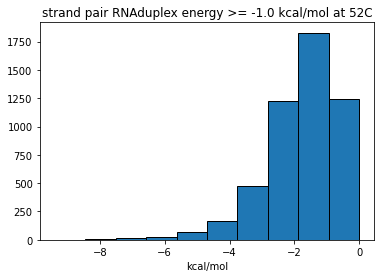

In [6]:
# test search.display_report after removing pint

import nuad.constraints as nc
import nuad.search as ns

random_seed = 1

# many 4-domain strands with no common domains, 4 domains each, every domain length = 10

# num_strands = 3
# num_strands = 5
# num_strands = 10
# num_strands = 50
num_strands = 100

design = nc.Design()
#                     si         wi         ni         ei
# strand i is    [----------|----------|----------|---------->
for i in range(num_strands):
    design.add_strand([f's{i}', f'w{i}', f'n{i}', f'e{i}'])

numpy_filters = [nc.NearestNeighborEnergyFilter(-9.3, -9.0, 52.0)]

replace_with_close_sequences = True
domain_pool_10 = nc.DomainPool(f'length-10_domains', 10,
                               numpy_filters=numpy_filters,
                               replace_with_close_sequences=replace_with_close_sequences,
                               )
domain_pool_11 = nc.DomainPool(f'length-11_domains', 11,
                               numpy_filters=numpy_filters,
                               replace_with_close_sequences=replace_with_close_sequences,
                               )

for strand in design.strands:
    for domain in strand.domains[:2]:
        domain.pool = domain_pool_10
    for domain in strand.domains[2:]:
        domain.pool = domain_pool_11

strand_pairs_rna_duplex_constraint = nc.rna_duplex_strand_pairs_constraint(
    threshold=-1.0, temperature=52, short_description='RNAduplex')

constraints = [strand_pairs_rna_duplex_constraint]

ns.assign_sequences_to_domains_randomly_from_pools(design=design, warn_fixed_sequences=True)

ns.display_report(design=design, constraints=constraints)

In [22]:
import pint
ureg = pint.UnitRegistry()
q1 = pint.Quantity(-2.5, ureg.kcal/ureg.mol)
print(f'{q1=}')
q2 = q1.ito(ureg.kcal/ureg.mol, magnitude=-3.0)
print(f'{q1=}')
print(f'{q2=}')

q1=<Quantity(-2.5, 'kilocalorie / mole')>
q1=<Quantity(-2.5, 'kilocalorie / mole')>
q2=None


In [21]:
import pint

ureg = pint.UnitRegistry()


quantities = [ureg.Quantity(-2.5, ureg.kcal / ureg.mol) for _ in range(10)]


quantities[0] = quantities[0].ito(ureg.kcal / ureg.mol, magnitude=-3.0)


print(quantities[0])

None
